In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('PPTL.csv')
df

,Concepts,Definition,CleanedTweet,Label
0,Acute myocardial infarction,"Necrosis of the myocardium, as a result of int...",acute myocardial infarction is a blockage of b...,1
1,Acute myocardial infarction,"Necrosis of the myocardium, as a result of int...",acutemyocardialinfarction is a pathology chara...,1
2,Acute myocardial infarction,"Necrosis of the myocardium, as a result of int...",physical activity and anger or emotional upset...,1
3,Acute myocardial infarction,"Necrosis of the myocardium, as a result of int...",thrombus composition in sudden cardiacdeath fr...,1
4,Acute myocardial infarction,"Necrosis of the myocardium, as a result of int...",respiratoryinfection associated with increased...,1
...,...,...,...,...
3428,Pleurisy,"\ninflammation of the pleura, with exudation i...",lupusfact lupus can attack your lungs potenti...,1
3429,Pleurisy,"\ninflammation of the pleura, with exudation i...",lupusfact lupus can attack your lungs potenti...,1
3430,Pleurisy,"\ninflammation of the pleura, with exudation i...",lupusfact lupus can attack your lungs potenti...,1
3431,Pleurisy,"\ninflammation of the pleura, with exudation i...",lupusfact lupus can attack your lungs potenti...,0


In [3]:
df.columns

Index(['Concepts', 'Definition', 'CleanedTweet', 'Label'], dtype='object')

In [4]:
df.head(5)

,Concepts,Definition,CleanedTweet,Label
0,Acute myocardial infarction,"Necrosis of the myocardium, as a result of int...",acute myocardial infarction is a blockage of b...,1
1,Acute myocardial infarction,"Necrosis of the myocardium, as a result of int...",acutemyocardialinfarction is a pathology chara...,1
2,Acute myocardial infarction,"Necrosis of the myocardium, as a result of int...",physical activity and anger or emotional upset...,1
3,Acute myocardial infarction,"Necrosis of the myocardium, as a result of int...",thrombus composition in sudden cardiacdeath fr...,1
4,Acute myocardial infarction,"Necrosis of the myocardium, as a result of int...",respiratoryinfection associated with increased...,1


In [5]:
df.tail(5)

,Concepts,Definition,CleanedTweet,Label
3428,Pleurisy,"\ninflammation of the pleura, with exudation i...",lupusfact lupus can attack your lungs potenti...,1
3429,Pleurisy,"\ninflammation of the pleura, with exudation i...",lupusfact lupus can attack your lungs potenti...,1
3430,Pleurisy,"\ninflammation of the pleura, with exudation i...",lupusfact lupus can attack your lungs potenti...,1
3431,Pleurisy,"\ninflammation of the pleura, with exudation i...",lupusfact lupus can attack your lungs potenti...,0
3432,Pleurisy,"\ninflammation of the pleura, with exudation i...",lupusfact lupus can attack your lungs potenti...,0


In [6]:
df.describe()

,Label
count,3433.00000
mean,0.60501
std,0.48892
min,0.00000
25%,0.00000
50%,1.00000
75%,1.00000
max,1.00000


In [7]:
df.shape

(3433, 4)

In [8]:
df.Label.unique()

array([1, 0], dtype=int64)

In [9]:
df.isnull().sum()

Concepts        0
Definition      0
CleanedTweet    0
Label           0
dtype: int64

<AxesSubplot:>

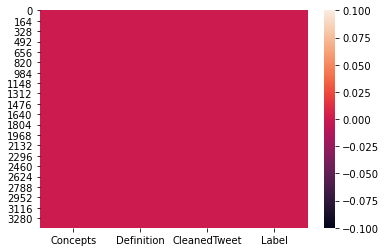

In [10]:
sns.heatmap(df.isnull())

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [12]:
df["Label"] = le.fit_transform(df["Label"])
le.classes_

array([0, 1], dtype=int64)

In [13]:
from scipy import stats
stats.mode(df.Label)

ModeResult(mode=array([1], dtype=int64), count=array([2077]))

In [14]:
df.describe()

,Label
count,3433.00000
mean,0.60501
std,0.48892
min,0.00000
25%,0.00000
50%,1.00000
75%,1.00000
max,1.00000


1    2077
0    1356
Name: Label, dtype: int64

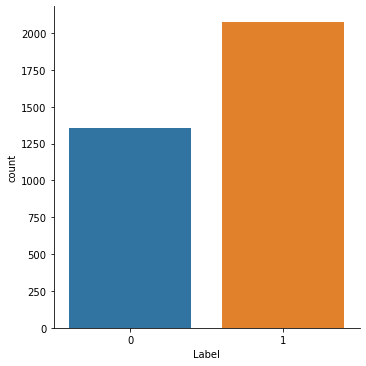

In [15]:
sns.catplot(x='Label',data=df,kind='count')
df.Label.value_counts()

In [16]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [17]:
import nltk   #cleaning
df['CleanedTweet'] = df['CleanedTweet'].str.replace('[^\w\s]','')  #removal of punctuation
df['CleanedTweet'] = df['CleanedTweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))#lower case
from nltk.corpus import stopwords #removal of stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
df['CleanedTweet'] = df['CleanedTweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

<ipython-input-17-cc3004f231d8>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['CleanedTweet'] = df['CleanedTweet'].str.replace('[^\w\s]','')  #removal of punctuation
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luffy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
words = []   #building document-term matrix
from nltk.tokenize import RegexpTokenizer
from gensim import corpora,models
tokenizer = RegexpTokenizer(r'\w+')
for x in pd.Series(df['CleanedTweet']):
  a = tokenizer.tokenize(x)
  words.append(a)
dictionary = corpora.Dictionary(words)
corpus = [dictionary.doc2bow(word) for word in words]

In [33]:
import gensim  #LDA model
model = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word = dictionary,passes = 20)

In [20]:
print(model.print_topics(num_topics = 10, num_words = 5))

[(0, '0.023*"paininlimb" + 0.020*"scalp" + 0.016*"dry" + 0.015*"dryscalp" + 0.014*"pain"'), (1, '0.019*"stress" + 0.017*"skin" + 0.014*"family" + 0.013*"news" + 0.013*"sick"'), (2, '0.015*"sinusheadache" + 0.015*"headache" + 0.014*"sinus" + 0.010*"pain" + 0.010*"e"'), (3, '0.020*"getting" + 0.018*"lungs" + 0.017*"feet" + 0.017*"respiratoryfailure" + 0.016*"night"'), (4, '0.022*"odynophagia" + 0.020*"painful" + 0.018*"peritonitis" + 0.017*"swallowing" + 0.015*"causes"'), (5, '0.034*"obesity" + 0.013*"petechiae" + 0.009*"risk" + 0.005*"fat" + 0.005*"people"'), (6, '0.028*"phlebitis" + 0.014*"oligomenorrhea" + 0.014*"paresis" + 0.013*"veins" + 0.009*"blood"'), (7, '0.018*"pericarditis" + 0.015*"otitismedia" + 0.015*"ear" + 0.014*"health" + 0.010*"pain"'), (8, '0.024*"infection" + 0.022*"bacterial" + 0.020*"secondary" + 0.020*"leads" + 0.019*"thought"'), (9, '0.028*"pleurisy" + 0.021*"oppositional" + 0.020*"lupus" + 0.017*"causing" + 0.017*"pneumonia"')]


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3433 entries, 0 to 3432
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Concepts      3433 non-null   object
 1   Definition    3433 non-null   object
 2   CleanedTweet  3433 non-null   object
 3   Label         3433 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 107.4+ KB


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf= TfidfVectorizer(ngram_range=(1,2), max_features=1000)
tf_idf.fit(df['CleanedTweet'])
x_values =  tf_idf.transform(df['CleanedTweet'])
y_values = df['Label']


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_values, y_values, test_size = 0.2)

D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Concepts', ylabel='Label'>

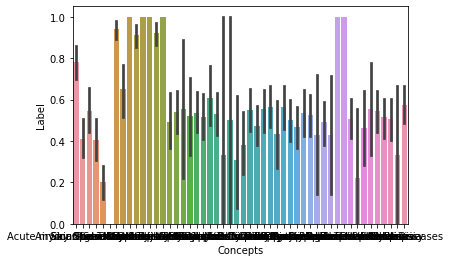

In [24]:
sns.barplot(df['Concepts'],df['Label'])

D:\New folder\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Label', ylabel='Density'>

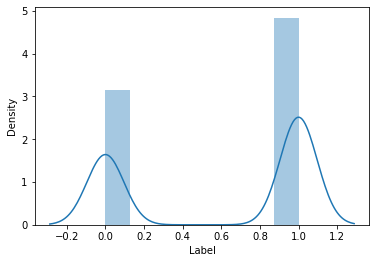

In [25]:
sns.distplot(df['Label'])

D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Concepts', ylabel='Label'>

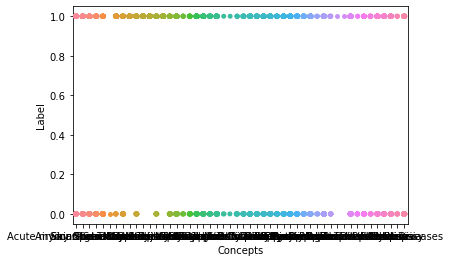

In [26]:
sns.stripplot(df['Concepts'],df['Label'])

D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Concepts', ylabel='Label'>

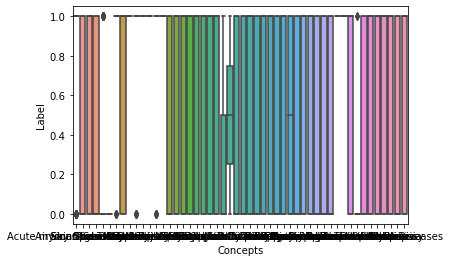

In [27]:
sns.boxplot(df['Concepts'],df['Label'])

In [41]:
from sklearn import metrics

def evaluation(y_pred, y_test):
    Accuracy = metrics.accuracy_score(y_pred, y_test)
    Recall = metrics.recall_score(y_pred = y_pred, y_true = y_test, pos_label='positive', average='micro') # micro calculates total true positives, false negatives and false positives
    Precision = metrics.precision_score(y_pred = y_pred, y_true = y_test, pos_label='positive', average='micro') # micro calculates total true positives, false negatives and false positives
    F1 = 2 * (Precision * Recall) / (Precision + Recall) # Formula for F1 Score
    print("Accuracy: ", Accuracy.round(4))
    print("Recall:", Recall.round(4))
    print("Precision:", Precision.round(4))
    print("F-1 score:", F1.round(4))

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidfvector = TfidfVectorizer(ngram_range=(1,2), max_features=1000)
Tfidfvector.fit(df['CleanedTweet'])
x_values = Tfidfvector.transform(df['CleanedTweet'])
encoder = LabelEncoder()
y_values = encoder.fit_transform(df['Label'])

In [42]:
X=df.drop('Label',axis=1) ##input
y=df.abel               ##output

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2,random_state=1)

In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2746, 3)
(687, 3)
(2746,)
(687,)


In [46]:
from sklearn import model_selection
X_train, x_test, y_train, y_test = model_selection.train_test_split(x_values, y_values, test_size=0.2)


In [48]:
from sklearn import naive_bayes
from sklearn.model_selection import cross_val_score, KFold

naive_bayes_implement = naive_bayes.MultinomialNB()

naive_bayes_implement.fit(x_train,y_train)

y_pred_valid = naive_bayes_implement.predict(x_valid)
evaluation(y_pred_valid, y_valid)
print("Cross Validation Score:", cross_val_score(naive_bayes_implement, x_valid, y_valid, cv= KFold(10, shuffle=True, random_state = 22)).mean().round(4))

Accuracy:  0.5459
Recall: 0.5459
Precision: 0.5459
F-1 score: 0.5459
Cross Validation Score: 0.6493


D:\New folder\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
D:\New folder\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [49]:
from sklearn import svm

svm_implement = svm.SVC()

svm_implement.fit(x_train,y_train)

y_pred_valid = svm_implement.predict(x_valid)
evaluation(y_pred_valid, y_valid)
print("Cross Validation Score:", cross_val_score(svm_implement, x_valid, y_valid, cv= KFold(10, shuffle=True, random_state = 22)).mean().round(4))


D:\New folder\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
D:\New folder\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


Accuracy:  0.5633
Recall: 0.5633
Precision: 0.5633
F-1 score: 0.5633
Cross Validation Score: 0.6202


<AxesSubplot:>

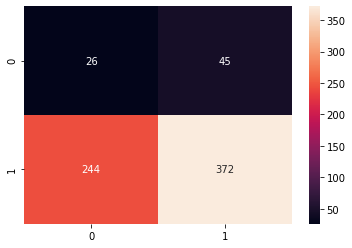

In [40]:
from sklearn.metrics import confusion_matrix,classification_report
sns.heatmap(confusion_matrix(y_pred_valid, y_valid),annot=True,fmt='d')